In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import cartopy
import pickle
import os

# Eulerian Storm Tracker

In [7]:
file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v2.001_1977_1981/eulerian_storm_track/plot_data.pkl'
WK_DIR = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v2.001_1977_1981/eulerian_storm_track'
data = pickle.load(open(file, 'rb'))
print(data.keys())

dict_keys(['era5', 'erai', 'model', 'model_zonal', 'era5_zonal', 'erai_zonal'])


In [8]:
erai = data['erai']
model = data['model']

e_zonal = data['erai_zonal']
m_zonal = data['model_zonal']

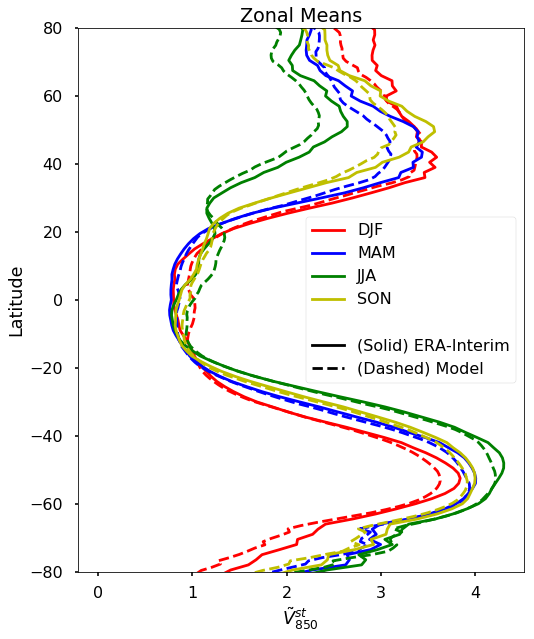

In [9]:
# zonal figure
plt.style.use('seaborn-poster')
plt.figure(figsize=(8, 10))
plt.plot(e_zonal['djf'], e_zonal['lat'], 'r', label='DJF')
plt.plot(m_zonal['djf'], m_zonal['lat'], 'r--')
plt.plot(e_zonal['mam'], e_zonal['lat'], 'b', label='MAM')
plt.plot(m_zonal['mam'], m_zonal['lat'], 'b--')
plt.plot(e_zonal['jja'], e_zonal['lat'], 'g', label='JJA')
plt.plot(m_zonal['jja'], m_zonal['lat'], 'g--')
plt.plot(e_zonal['son'], e_zonal['lat'], 'y', label='SON')
plt.plot(m_zonal['son'], m_zonal['lat'], 'y--')

plt.plot([0, 0], [0, 0], 'w', label=' ')
plt.plot([0, 0], [0, 0], 'k-', label='(Solid) ERA-Interim')
plt.plot([0, 0], [0, 0], 'k--', label='(Dashed) Model')
plt.title(r'Zonal Means')
plt.xlabel(r'$\tilde{V}^{st}_{850}$')
plt.ylabel(r'Latitude')
plt.ylim(-80, 80)
plt.legend(loc=0)
plt.savefig(os.path.join(WK_DIR, 'zonal_means.png'), dpi=300.)
plt.show()

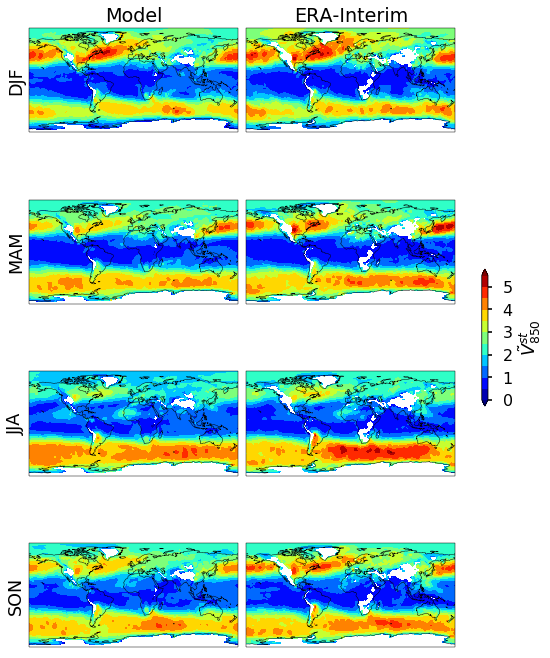

In [10]:
levels = np.arange(0, 6, .5)
plt.style.use('seaborn-poster')

plt.figure(figsize=(8,10))

season='djf'
ax1_1 = ax = plt.subplot(4,2,1, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())
ax.set_title('Model')

ax1_2 = ax = plt.subplot(4,2,2, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_title('ERA-Interim')

season='mam'
ax2_1 = ax = plt.subplot(4,2,3, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax2_2 = ax = plt.subplot(4,2,4, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

season='jja'
ax3_1 = ax = plt.subplot(4,2,5, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax3_2 = ax = plt.subplot(4,2,6, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

season='son'
ax4_1 = ax = plt.subplot(4,2,7, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(model['lon'], model['lat'], model[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()
ax.set_yticks([]); ax.set_ylabel(season.upper())

ax4_2 = ax = plt.subplot(4,2,8, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(erai['lon'], erai['lat'], erai[season], cmap='jet', extend='both', levels=levels)
ax.coastlines()

plt.tight_layout()
cax = plt.colorbar(pc, ax=[ax1_1, ax1_2, ax2_1, ax2_2, ax3_1, ax3_2, ax4_1, ax4_2], shrink=.2)
cax.set_label(r'$\tilde{V}^{st}_{850}$')

plt.savefig(os.path.join(WK_DIR, 'eulerian_storm_track.png'), dpi=300.)
plt.show()

# Zonal Means

In [11]:
WK_DIR = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_QBOi.EXP1.AMIP.v4.001_2008_2012/etc_composites'
c_file = f'{WK_DIR}/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'
model_data = pickle.load(open(c_file, 'rb'))

In [12]:
print(model_data.keys())
print(model_data['SH']['ocean']['warm'].keys())
print(model_data['SH']['ocean']['warm']['tp'].keys())

dict_keys(['NH', 'SH', 'x', 'y', 'x_edges', 'y_edges'])
dict_keys(['tp', 'prw'])
dict_keys(['circ_sum', 'circ_cnt', 'area_sum', 'area_cnt'])


In [13]:
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'tp'
model_tp = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_prw = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']

/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [14]:
import xarray as xr
from scipy import interpolate
###################################################
##### Creating plots from obs/merra and era-interim
###################################################


OBS_DATA = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites'

# load in the netcdf files
obs_file = f"{OBS_DATA}/modis_merra.nc"
era_file = f"{OBS_DATA}/era_interim.nc"

# reading in the observation file
ds = xr.open_dataset(obs_file)
obs_x = ds['X'].values
obs_y = ds['Y'].values
modis_cld = ds['modis_cld'].values
merra_pw = ds['merra_pw'].values
merra_omega = ds['merra_omega'].values
ds.close()

# reading in the re-analysis file
ds = xr.open_dataset(era_file)
erai_x = ds['X'].values
erai_y = ds['Y'].values
pr_nh_ocean_warm = ds['pr_nh_ocean_warm'].values
prw_nh_ocean_warm = ds['prw_nh_ocean_warm'].values
ws_nh_ocean_warm = ds['ws_nh_ocean_warm'].values
pr_sh_ocean_warm = ds['pr_sh_ocean_warm'].values
prw_sh_ocean_warm = ds['prw_sh_ocean_warm'].values
ws_sh_ocean_warm = ds['ws_sh_ocean_warm'].values
ds.close()

# Re-griding the observation data
## setting up the necessary x,y values in the format required for griddata
obs_x_1d = obs_x.flatten()
obs_y_1d = obs_y.flatten()

modis_cld_1d = modis_cld.flatten()
merra_pw_1d = merra_pw.flatten()
merra_omega_1d = merra_omega.flatten()

## the erai x and y are 1d, have to convert it to a 2d grid
erai_x_grid, erai_y_grid = np.meshgrid(erai_x, erai_y)
erai_x_1d = erai_x_grid.flatten()
erai_y_1d = erai_y_grid.flatten()

# interpolating the ang, dist plots from observations on to the erai standard grid (same grid as the outputs from the model)
erai_modis_cld = interpolate.griddata((obs_x_1d, obs_y_1d), modis_cld_1d, (erai_x_1d, erai_y_1d))
erai_modis_cld = erai_modis_cld.reshape(erai_x_grid.shape)

erai_merra_pw = interpolate.griddata((obs_x_1d, obs_y_1d), merra_pw_1d, (erai_x_1d, erai_y_1d))
erai_merra_pw = erai_merra_pw.reshape(erai_x_grid.shape)

erai_merra_omega = interpolate.griddata((obs_x_1d, obs_y_1d), merra_omega_1d, (erai_x_1d, erai_y_1d))
erai_merra_omega = erai_merra_omega.reshape(erai_x_grid.shape)

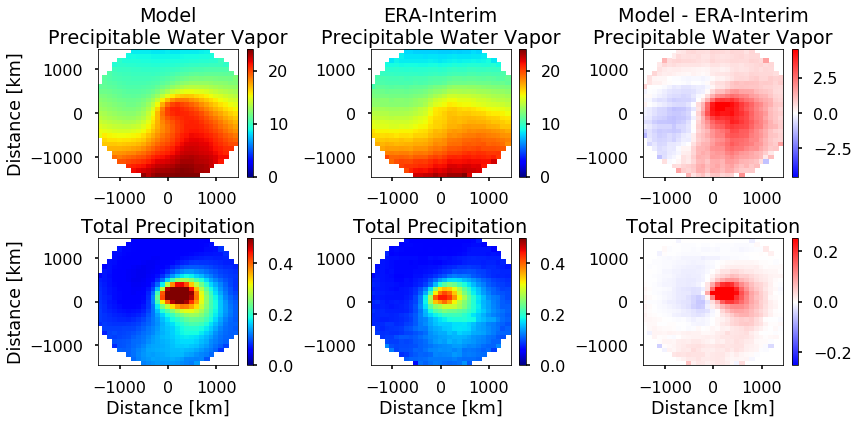

In [28]:
plt.style.use('seaborn-poster')

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.pcolormesh(erai_x, erai_y, model_prw, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('Model\nPrecipitable Water Vapor')
plt.ylabel('Distance [km]')

plt.subplot(2,3,2)
plt.pcolormesh(erai_x, erai_y, prw_sh_ocean_warm, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('ERA-Interim\nPrecipitable Water Vapor')

plt.subplot(2,3,3)
plt.pcolormesh(erai_x, erai_y, model_prw - prw_sh_ocean_warm, cmap='bwr', vmin=-4.5, vmax=4.5)
plt.colorbar()
plt.title('Model - ERA-Interim\nPrecipitable Water Vapor')

plt.subplot(2,3,4)
plt.pcolormesh(erai_x, erai_y, model_tp, cmap='jet', vmin=0, vmax=0.5)
plt.colorbar()
plt.title('Total Precipitation')
plt.ylabel('Distance [km]')
plt.xlabel('Distance [km]')

plt.subplot(2,3,5)
plt.pcolormesh(erai_x, erai_y, pr_sh_ocean_warm, cmap='jet', vmin=0, vmax=0.5)
plt.colorbar()
plt.title('Total Precipitation')
plt.xlabel('Distance [km]')

plt.subplot(2,3,6)
plt.pcolormesh(erai_x, erai_y, model_tp - pr_sh_ocean_warm, cmap='bwr', vmin=-.25, vmax=.25)
plt.colorbar()
plt.title('Total Precipitation')
plt.xlabel('Distance [km]')

plt.tight_layout()
plt.savefig(os.path.join(WK_DIR, 'tp_prw_model_erai.png'),dpi=300.)
plt.show()

# Track stats plot

In [29]:
t_file = os.path.join(WK_DIR, 'track_stats.pkl')
t_data = pickle.load(open(t_file, 'rb'))

In [48]:
stats = t_data['stats']
t_lat = t_data['lat']
t_lon = t_data['lon']

print(stats.keys())
print(stats['all'].keys())

fd = 100*stats['all']['feature_density']
td = 100*stats['all']['track_density']

ge = 100*stats['genesis']
ly = 100*stats['lysis']

dict_keys(['all', 'genesis', 'lysis'])
dict_keys(['feature_density', 'track_density'])


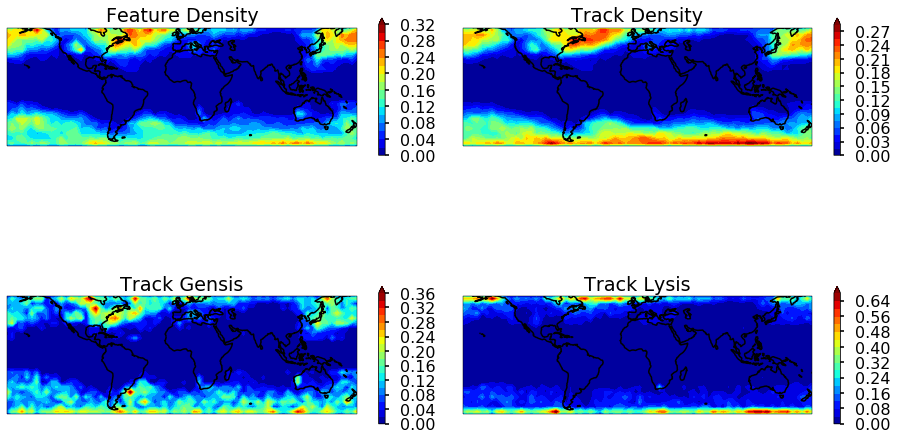

In [65]:
plt.style.use('seaborn-poster')


levels = 20

plt.figure()
ax = plt.subplot(2,2,1, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(t_lon, t_lat, fd, cmap='jet', levels=levels, extend='max')
ax.coastlines(color='k', lw=1.5)
ax.set_title('Feature Density')
plt.colorbar(pc, ax=ax, shrink=0.4)
ax.set_ylim(-60, 60)

ax = plt.subplot(2,2,2, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(t_lon, t_lat, td, cmap='jet', levels=levels, extend='max')
ax.coastlines(color='k', lw=1.5)
ax.set_title('Track Density')
plt.colorbar(pc, ax=ax, shrink=0.4)
ax.set_ylim(-60, 60)

ax = plt.subplot(2,2,3, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(t_lon, t_lat, ge, cmap='jet', levels=levels, extend='max')
ax.coastlines(color='k', lw=1.5)
ax.set_title('Track Gensis')
plt.colorbar(pc, ax=ax, shrink=0.4)
ax.set_ylim(-60, 60)

ax = plt.subplot(2,2,4, projection=cartopy.crs.PlateCarree())
pc = ax.contourf(t_lon, t_lat, ly, cmap='jet', levels=levels, extend='max')
ax.coastlines(color='k', lw=1.5)
ax.set_title('Track Lysis')
plt.colorbar(pc, ax=ax, shrink=0.4)
ax.set_ylim(-60, 60)

plt.tight_layout()
plt.savefig(os.path.join(WK_DIR, 'track_stats.png'), dpi=300.)
plt.show()

In [129]:
out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_modis_cld_SH_ocean_WARM.png"
title = 'MODIS Cloud Cover [SH-Ocean-WARM]'
# plot_area_fig(obs_x,obs_y,modis_cld,title,out_file)
plot_area_fig(erai_x,erai_y,erai_modis_cld,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_merra_pw_SH_ocean_WARM.png"
title = 'MERRA Precipitation [SH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,erai_merra_pw,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_merra_omega_SH_ocean_WARM.png"
title = 'MERRA Omega @ 500 hPa [SH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,erai_merra_omega,title,out_file)


# SH - Ocean - WARM
out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_pr_SH_ocean_WARM.png"
title = 'ERA-Interim PR [SH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,pr_sh_ocean_warm,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_prw_SH_ocean_WARM.png"
title = 'ERA-Interim PRW [SH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,prw_sh_ocean_warm,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_ws_SH_ocean_WARM.png"
title = 'ERA-Interim Wind Speed [SH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,ws_sh_ocean_warm,title,out_file)

# NH - Ocean - WARM

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_pr_NH_ocean_WARM.png"
title = 'ERA-Interim PR [NH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,pr_nh_ocean_warm,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_prw_NH_ocean_WARM.png"
title = 'ERA-Interim PRW [NH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,prw_nh_ocean_warm,title,out_file)

out_file = f"{os.environ['WK_DIR']}/obs/{os.environ['CASENAME']}_erai_ws_NH_ocean_WARM.png"
title = 'ERA-Interim Wind Speed [NH-Ocean-WARM]'
plot_area_fig(erai_x,erai_y,ws_nh_ocean_warm,title,out_file)


############################################################
####### Creating Difference Plots
############################################################

## Reading in the model composites
model_file = f"{os.environ['WK_DIR']}/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl"
model_data = pickle.load(open(model_file, 'rb'))

# Creating the plots

# MODEL - ERA-Interim PR (Total Precip)
out_file = f"{os.environ['WK_DIR']}/model/{os.environ['CASENAME']}_erai_pr_SH_ocean_WARM.png"
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'tp'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.figure()
diff_val = model_val - pr_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 80)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.title(f"{os.environ['CASENAME']} - ERA-Interim\nSH OCEAN WARM PR")
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)
plt.colorbar()
plt.savefig(out_file)
plt.close('all')

# MODEL - ERA-Interim PRW (Total Column Water Vapor)
out_file = f"{os.environ['WK_DIR']}/model/{os.environ['CASENAME']}_erai_prw_SH_ocean_WARM.png"
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.figure()
diff_val = model_val - prw_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 80)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.title(f"{os.environ['CASENAME']} - ERA-Interim\nSH OCEAN WARM PRW")
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)
plt.colorbar()
plt.savefig(out_file)
plt.close('all')

# MERRA - ERA-Interim
out_file = f"{os.environ['WK_DIR']}/obs/merra_erai_pw_SH_ocean_WARM.png"
plt.figure()
diff_val = erai_merra_pw - prw_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 80)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
# plt.title(f"MERRA -  {os.environ['CASENAME']}\nPW")
plt.title(f"MERRA -  ERA-Interim\nSH OCEAN WARM PW")
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)
plt.colorbar()
plt.savefig(out_file)
plt.close('all')

print('Done Completing ETC-composites driver code.')

KeyError: 'WK_DIR'